In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:

df = pd.read_csv("sy.csv", encoding="latin1")
df.head(10)

,Sr. No.,Police Station,Year,Head,Date,Place_of_offence,Key_location,Week_no.,Geo_Location,Crowd_Density,Crime_Location_Type
0,1,Anjuna_Ps,2019,Theft (Auto Theft),03-03-2019,Munag Vaddo Assagao,Assagao,1,"(15.6000, 73.7500)",Low,LocalArea
1,2,Anjuna_Ps,2019,Theft (Auto Theft),14-10-2019,Chapora Bardez Goa,Chapora,2,"(15.6032, 73.7421)",Medium,ClubArea
2,3,Anjuna_Ps,2019,Theft (Auto Theft),22-10-2019,Near Gram Panchayat Building Assagao,Assagao,4,"(15.6000, 73.7500)",Low,LocalArea
3,4,Anjuna_Ps,2019,Theft (Auto Theft),26-10-2019,Arpora Bardez Goa,Arpora,4,"(15.5728, 73.7677)",Medium,ClubArea
4,5,Anjuna_Ps,2019,Theft (Auto Theft),22-11-2019,Vale Vaddo Assagao,Assagao,4,"(15.6000, 73.7500)",Low,LocalArea
5,6,Anjuna_Ps,2019,Theft (Auto Theft),19-12-2019,Near 23 Rest Arpora,Arpora,3,"(15.5728, 73.7677)",Medium,ClubArea
6,7,Anjuna_Ps,2019,Theft (House Theft),24-02-2019,Villa No.2 Candy Flas Nagoa,Nagoa,4,"(15.5700, 73.7700)",Low,InHouse
7,8,Anjuna_Ps,2019,Theft (House Theft),10-08-2019,Jungle Guest House Vagator,Vagator,2,"(15.5916, 73.7441)",Medium,InHouse
8,9,Anjuna_Ps,2019,Theft (House Theft),11-10-2019,Shri Siddeshwar Devasthan Chapora,Chapora,2,"(15.6032, 73.7421)",Medium,LocalArea
9,10,Anjuna_Ps,2019,Theft (House Theft),09-12-2019,Bloo Resort Vagator,Vagator,2,"(15.5916, 73.7441)",Medium,InHouse


In [42]:
print("\nColumns and Data Types:")
df.info()


Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sr. No.              770 non-null    int64 
 1   Police Station       770 non-null    object
 2   Year                 770 non-null    int64 
 3   Head                 770 non-null    object
 4   Date                 770 non-null    object
 5   Place_of_offence     770 non-null    object
 6   Key_location         770 non-null    object
 7   Week_no.             770 non-null    int64 
 8   Geo_Location         770 non-null    object
 9   Crowd_Density        770 non-null    object
 10  Crime_Location_Type  770 non-null    object
dtypes: int64(3), object(8)
memory usage: 66.3+ KB


In [43]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("\nNon-numeric Columns:", non_numeric_columns)


Non-numeric Columns: Index(['Police Station', 'Head', 'Date', 'Place_of_offence', 'Key_location',
       'Geo_Location', 'Crowd_Density', 'Crime_Location_Type'],
      dtype='object')


In [44]:
print("\nFrequency Analysis:")
for col in non_numeric_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Frequency Analysis:

Column: Police Station
Police Station
Mapusa_Ps     344
Anjuna_Ps     314
Colvale_PS    112
Name: count, dtype: int64

Column: Head
Head
Assault (Hurt)             190
Theft (Auto Theft)         146
Drug Related (NDPS)        129
Theft (House Theft)        107
Theft (HBT Night)           87
Assault (Hurt)              42
Theft (HBT Day)             26
Theft (Chain Snatching)     21
Theft (other  Theft )       12
Drug Related (NDPS)          6
Theft (Robbery)              4
Name: count, dtype: int64

Column: Date
Date
30-03-2022    5
22-09-2024    4
09-09-2021    4
26-01-2021    4
05-05-2022    4
             ..
31-05-2024    1
04-04-2024    1
24-12-2023    1
25-11-2023    1
11-10-2024    1
Name: count, Length: 596, dtype: int64

Column: Place_of_offence
Place_of_offence
Siolim                                  3
Oxel Siolim                             3
Ozran Vagator                           3
At Atafonde Moira Bardez Goa (Moira)    3
Guddem Siolim                

In [45]:
if len(non_numeric_columns) >= 2:
    contingency_table = pd.crosstab(df[non_numeric_columns[0]], df[non_numeric_columns[1]])
    print("\nContingency Table:")
    print(contingency_table)


Contingency Table:
Head            Assault (Hurt)  Assault (Hurt)   Drug Related (NDPS)  \
Police Station                                                         
Anjuna_Ps                  107                0                   89   
Colvale_PS                  45                0                   14   
Mapusa_Ps                   38               42                   26   

Head            Drug Related (NDPS)   Theft (Auto Theft)  \
Police Station                                             
Anjuna_Ps                          0                  41   
Colvale_PS                         0                  13   
Mapusa_Ps                          6                  92   

Head            Theft (Chain Snatching)  Theft (HBT Day)  Theft (HBT Night)  \
Police Station                                                                
Anjuna_Ps                             4                4                 26   
Colvale_PS                            4                6                  9   
Ma

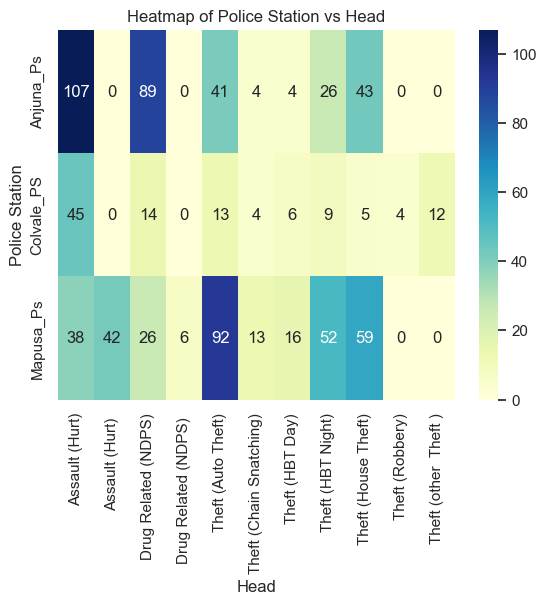

In [46]:
 # Visualize the contingency table
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title(f"Heatmap of {non_numeric_columns[0]} vs {non_numeric_columns[1]}")
plt.show()

Gaining insights

In [47]:

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)  # dd-mm-yyyy format
df["Month"] = df["Date"].dt.to_period("M")  # This gives you '2019-10', '2019-11', etc.




In [48]:
df.head(10)

,Sr. No.,Police Station,Year,Head,Date,Place_of_offence,Key_location,Week_no.,Geo_Location,Crowd_Density,Crime_Location_Type,Month
0,1,Anjuna_Ps,2019,Theft (Auto Theft),2019-03-03,Munag Vaddo Assagao,Assagao,1,"(15.6000, 73.7500)",Low,LocalArea,2019-03
1,2,Anjuna_Ps,2019,Theft (Auto Theft),2019-10-14,Chapora Bardez Goa,Chapora,2,"(15.6032, 73.7421)",Medium,ClubArea,2019-10
2,3,Anjuna_Ps,2019,Theft (Auto Theft),2019-10-22,Near Gram Panchayat Building Assagao,Assagao,4,"(15.6000, 73.7500)",Low,LocalArea,2019-10
3,4,Anjuna_Ps,2019,Theft (Auto Theft),2019-10-26,Arpora Bardez Goa,Arpora,4,"(15.5728, 73.7677)",Medium,ClubArea,2019-10
4,5,Anjuna_Ps,2019,Theft (Auto Theft),2019-11-22,Vale Vaddo Assagao,Assagao,4,"(15.6000, 73.7500)",Low,LocalArea,2019-11
5,6,Anjuna_Ps,2019,Theft (Auto Theft),2019-12-19,Near 23 Rest Arpora,Arpora,3,"(15.5728, 73.7677)",Medium,ClubArea,2019-12
6,7,Anjuna_Ps,2019,Theft (House Theft),2019-02-24,Villa No.2 Candy Flas Nagoa,Nagoa,4,"(15.5700, 73.7700)",Low,InHouse,2019-02
7,8,Anjuna_Ps,2019,Theft (House Theft),2019-08-10,Jungle Guest House Vagator,Vagator,2,"(15.5916, 73.7441)",Medium,InHouse,2019-08
8,9,Anjuna_Ps,2019,Theft (House Theft),2019-10-11,Shri Siddeshwar Devasthan Chapora,Chapora,2,"(15.6032, 73.7421)",Medium,LocalArea,2019-10
9,10,Anjuna_Ps,2019,Theft (House Theft),2019-12-09,Bloo Resort Vagator,Vagator,2,"(15.5916, 73.7441)",Medium,InHouse,2019-12


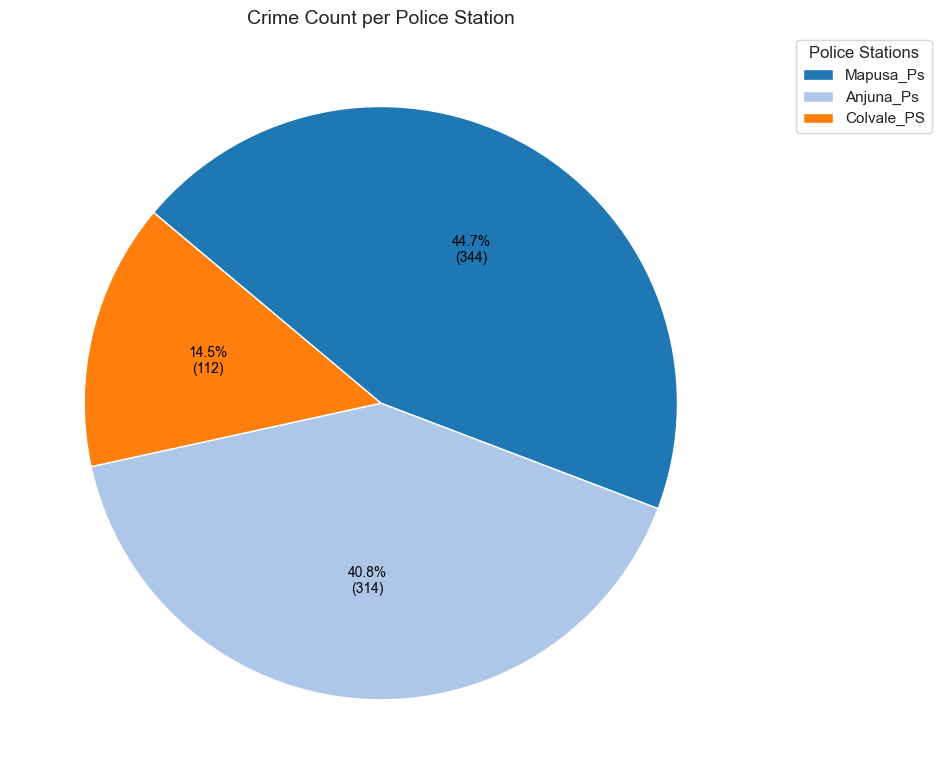

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('sy.csv', encoding='latin1')

# Drop rows with missing Sr. No. or Police Station
df = df.dropna(subset=['Sr. No.', 'Police Station'])

# Ensure Sr. No. is treated as unique identifier
df['Sr. No.'] = df['Sr. No.'].astype(str)

# Count unique crimes per police station
crime_counts = df.groupby('Police Station')['Sr. No.'].nunique().sort_values(ascending=False)

# Plot full circle pie chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors

# Create full pie chart
patches, texts, autotexts = plt.pie(
    crime_counts,
    labels=None,
    autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100 * crime_counts.sum()))})",
    startangle=140,
    counterclock=False,
    colors=colors
)

# Format percentage texts
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

# Add legend with station names
plt.legend(
    patches,
    crime_counts.index,
    title="Police Stations",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.title("Crime Count per Police Station", fontsize=14)
plt.tight_layout()
plt.show()


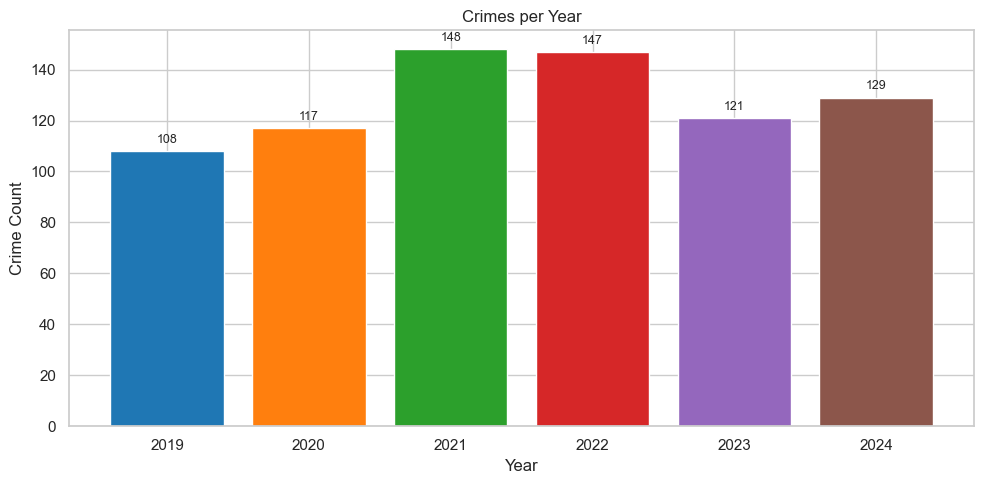

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Prepare data
yearly_counts = df["Year"].value_counts().sort_index()
colors = sns.color_palette("tab10", n_colors=len(yearly_counts))

# Plot bar chart
bars = ax.bar(yearly_counts.index.astype(str), yearly_counts.values, color=colors)

# Title and labels
ax.set_title("Crimes per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Crime Count")

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, str(int(height)), 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4376\2959490741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


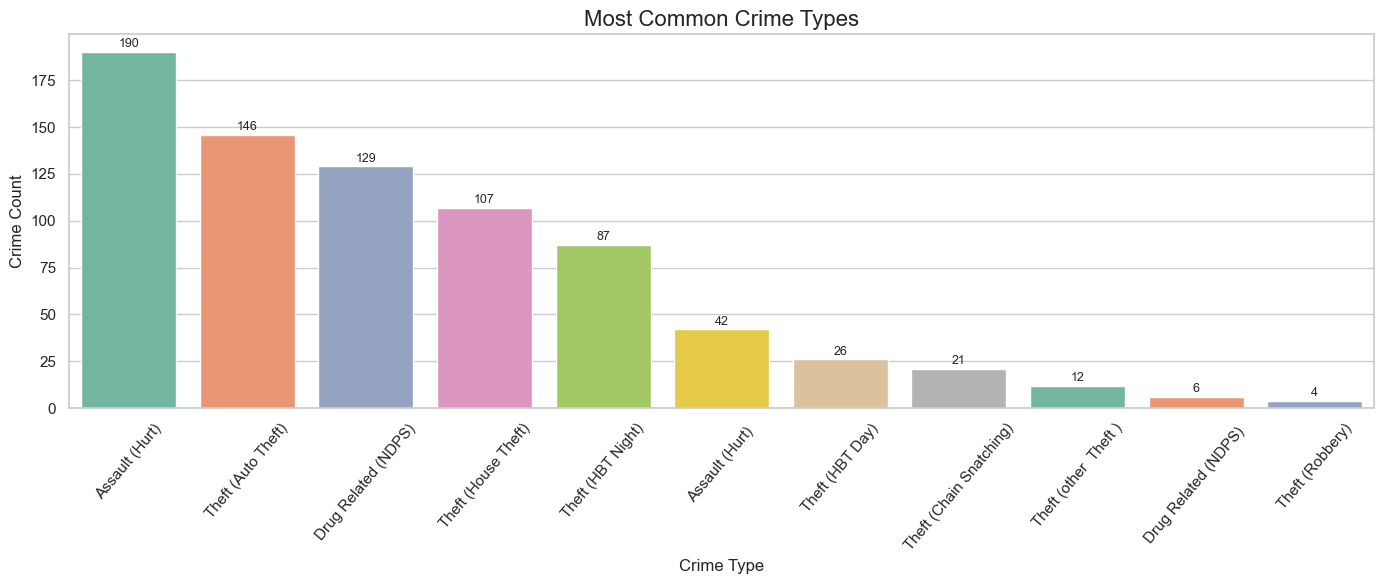

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 6))  # Wider for readability

# Plot the countplot with color palette
sns.countplot(
    data=df,
    x="Head",
    order=df["Head"].value_counts().index,
    ax=ax,
    palette="Set2"  # You can try 'husl', 'pastel', 'tab10', etc.
)

# Add labels and title
ax.set_title("Most Common Crime Types", fontsize=16)
ax.set_xlabel("Crime Type", fontsize=12)
ax.set_ylabel("Crime Count", fontsize=12)
plt.xticks(rotation=50)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 1,
                f'{int(height)}', ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


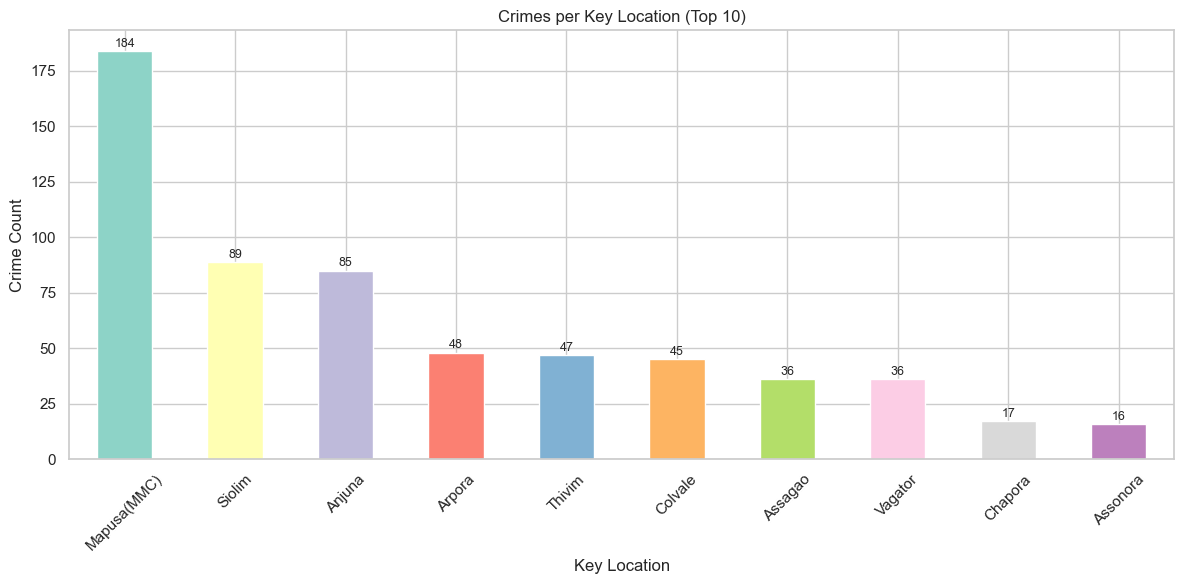


Top crime types in Mapusa(MMC):
Head
Theft (Auto Theft)         56
Theft (House Theft)        38
Theft (HBT Night)          29
Assault (Hurt)             17
Assault (Hurt)             14
Drug Related (NDPS)        14
Theft (HBT Day)             9
Theft (Chain Snatching)     6
Drug Related (NDPS)         1
Name: count, dtype: int64

Top crime types in Siolim:
Head
Assault (Hurt)             34
Drug Related (NDPS)        20
Theft (Auto Theft)         11
Theft (HBT Night)          10
Theft (House Theft)         9
Theft (HBT Day)             3
Theft (Chain Snatching)     1
Assault (Hurt)              1
Name: count, dtype: int64

Top crime types in Anjuna:
Head
Drug Related (NDPS)    35
Assault (Hurt)         23
Theft (House Theft)    11
Theft (Auto Theft)      9
Theft (HBT Night)       5
Theft (HBT Day)         2
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 locations by crime count
top_10_locations = df["Key_location"].value_counts().head(10)
colors = sns.color_palette("Set3", n_colors=10)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = top_10_locations.plot(kind="bar", ax=ax, color=colors)

# Add titles and labels
ax.set_title("Crimes per Key Location (Top 10)")
ax.set_xlabel("Key Location")
ax.set_ylabel("Crime Count")
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, count in enumerate(top_10_locations.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_4376\2721463616.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df, x="Day_of_Week", order=order, ax=ax, palette="pastel")


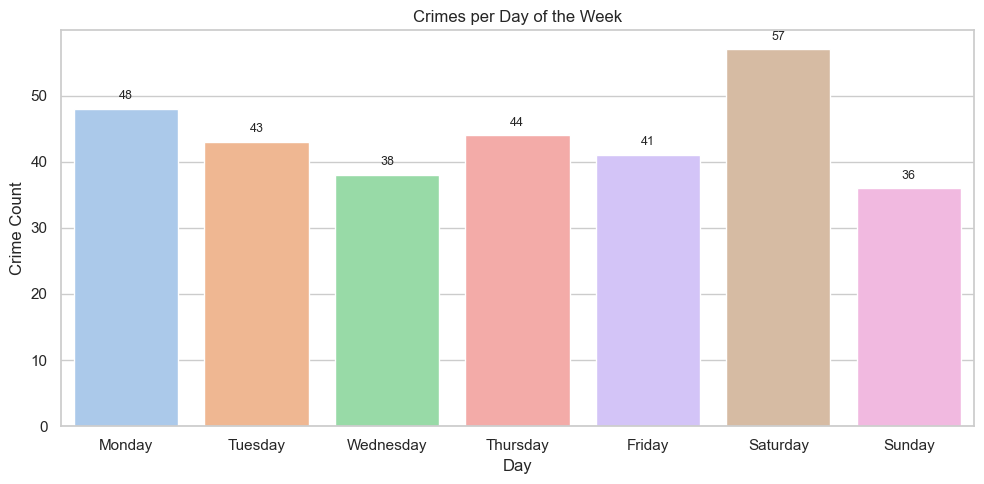

In [65]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
df["Day_of_Week"] = df["Date"].dt.day_name()



fig, ax = plt.subplots(figsize=(10, 5))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
bars = sns.countplot(data=df, x="Day_of_Week", order=order, ax=ax, palette="pastel")

ax.set_title("Crimes per Day of the Week")
ax.set_xlabel("Day")
ax.set_ylabel("Crime Count")

# Add count labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()




C:\Users\User\AppData\Local\Temp\ipykernel_4376\1395022181.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=crime_counts.index, y=crime_counts.values, ax=ax, palette="coolwarm")


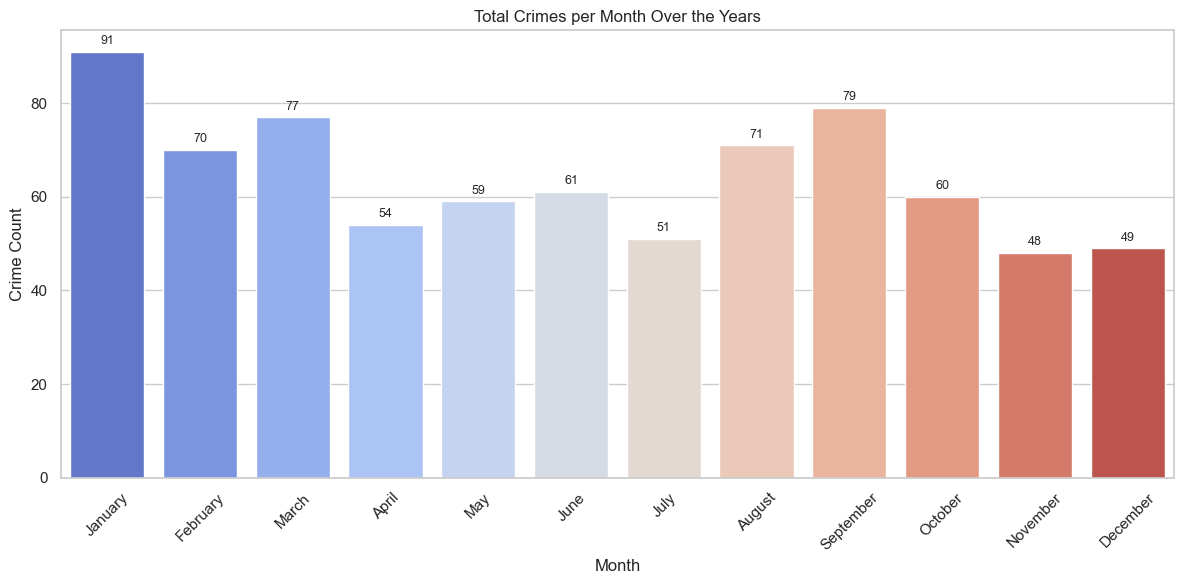

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop rows with invalid dates
df = df.dropna(subset=["Date"])

# Extract Month name from Date
df["Month"] = df["Date"].dt.month_name()

# Define the correct order of months
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Count crimes per month
crime_counts = df["Month"].value_counts().reindex(month_order)

# Bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x=crime_counts.index, y=crime_counts.values, ax=ax, palette="coolwarm")

# Formatting
ax.set_title("Total Crimes per Month Over the Years")
ax.set_xlabel("Month")
ax.set_ylabel("Crime Count")
plt.xticks(rotation=45)

# Add count labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


hypo

C:\Users\User\AppData\Local\Temp\ipykernel_4376\2737165655.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anjuna_drugs["Month"] = df_anjuna_drugs["Date"].dt.month_name()
C:\Users\User\AppData\Local\Temp\ipykernel_4376\2737165655.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=monthly_counts, x="Month", y="Average_Drug_Crime_Count", ax=ax, palette="coolwarm")


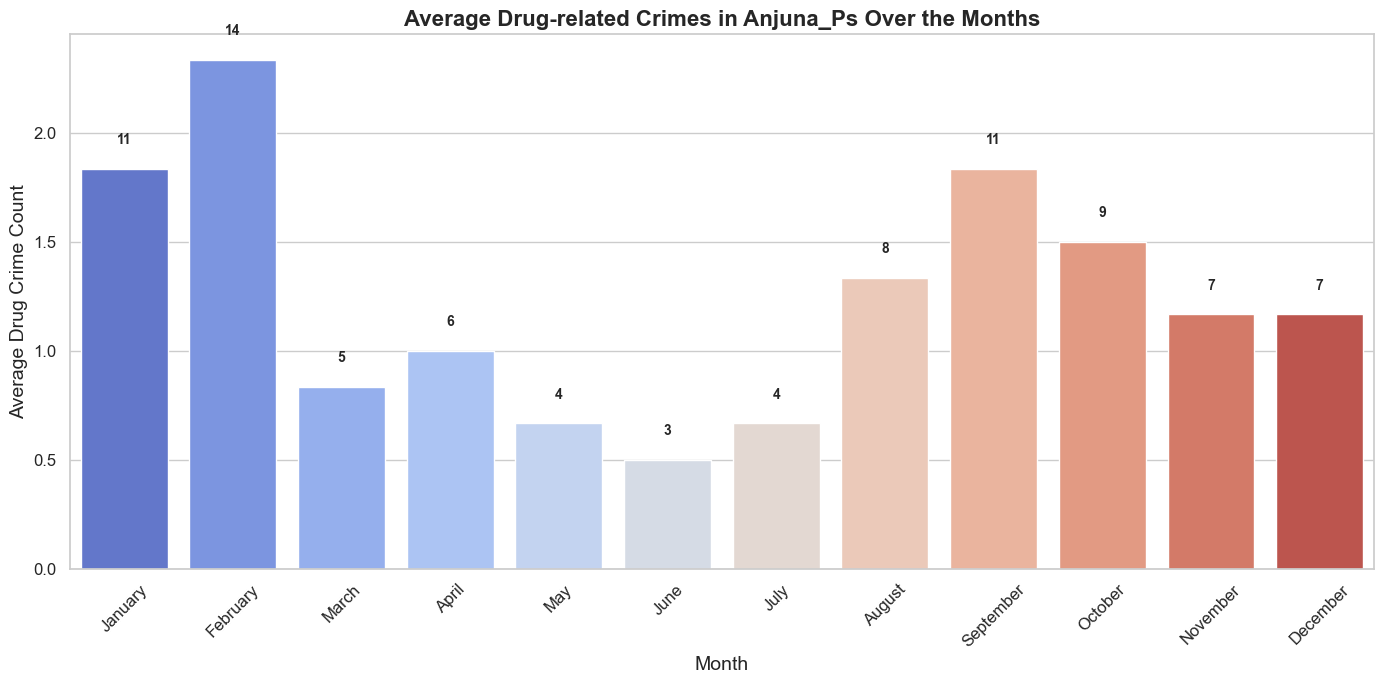

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for Anjuna_Ps and drug-related crimes
df_anjuna_drugs = df[(df["Police Station"] == "Anjuna_Ps") & 
                     (df["Head"].str.contains("Drug", case=False, na=False))]

# Make sure 'Month' column exists with month names
df_anjuna_drugs["Month"] = df_anjuna_drugs["Date"].dt.month_name()

# Define correct month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Compute average per month (total count divided by number of years)
monthly_counts = df_anjuna_drugs.groupby("Month").size().reset_index(name="Total_Count")
monthly_counts["Average_Drug_Crime_Count"] = monthly_counts["Total_Count"] / df_anjuna_drugs["Year"].nunique()

# Ensure months are in correct order
monthly_counts["Month"] = pd.Categorical(monthly_counts["Month"], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values("Month")

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
bars = sns.barplot(data=monthly_counts, x="Month", y="Average_Drug_Crime_Count", ax=ax, palette="coolwarm")

# Add count labels above bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    total = monthly_counts["Total_Count"].iloc[i]
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{total}", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
ax.set_title("Average Drug-related Crimes in Anjuna_Ps Over the Months", fontsize=16, fontweight='bold')
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Average Drug Crime Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4376\1426438795.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anjuna_drugs["Month"] = df_anjuna_drugs["Date"].dt.month_name()
C:\Users\User\AppData\Local\Temp\ipykernel_4376\1426438795.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=monthly_counts, x="Month", y="Average_Drug_Crime_Count", ax=ax, palette="coolwarm")


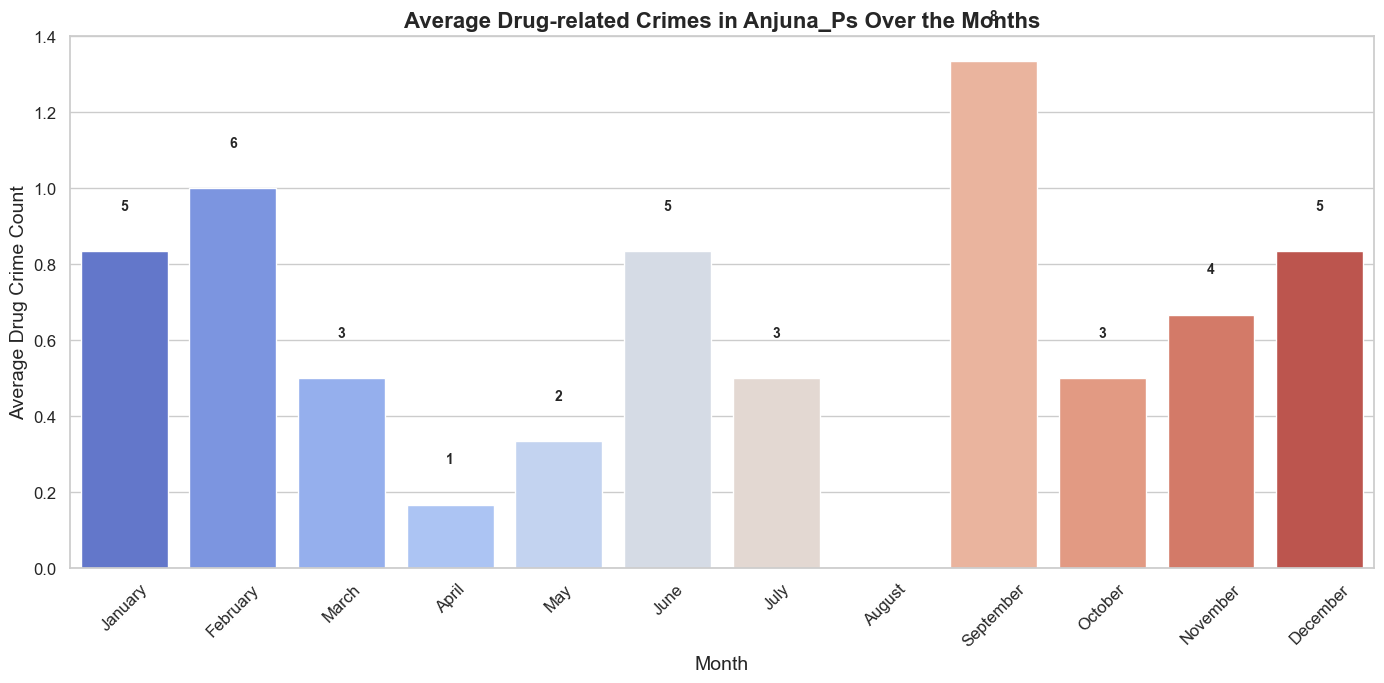

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for Anjuna_Ps and drug-related crimes
df_anjuna_drugs = df[(df["Police Station"] == "Anjuna_Ps") & 
                     (df["Head"].str.contains("Assault", case=False, na=False))]

# Make sure 'Month' column exists with month names
df_anjuna_drugs["Month"] = df_anjuna_drugs["Date"].dt.month_name()

# Define correct month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Compute average per month (total count divided by number of years)
monthly_counts = df_anjuna_drugs.groupby("Month").size().reset_index(name="Total_Count")
monthly_counts["Average_Drug_Crime_Count"] = monthly_counts["Total_Count"] / df_anjuna_drugs["Year"].nunique()

# Ensure months are in correct order
monthly_counts["Month"] = pd.Categorical(monthly_counts["Month"], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values("Month")

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
bars = sns.barplot(data=monthly_counts, x="Month", y="Average_Drug_Crime_Count", ax=ax, palette="coolwarm")

# Add count labels above bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    total = monthly_counts["Total_Count"].iloc[i]
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{total}", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
ax.set_title("Average DAssault(hurt) Crimes in Anjuna_Ps Over the Months", fontsize=16, fontweight='bold')
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Average Drug Crime Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4376\343249798.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anjuna_drugs["Month"] = df_anjuna_drugs["Date"].dt.month_name()
C:\Users\User\AppData\Local\Temp\ipykernel_4376\343249798.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=monthly_counts, x="Month", y="Average_Drug_Crime_Count", ax=ax, palette="coolwarm")


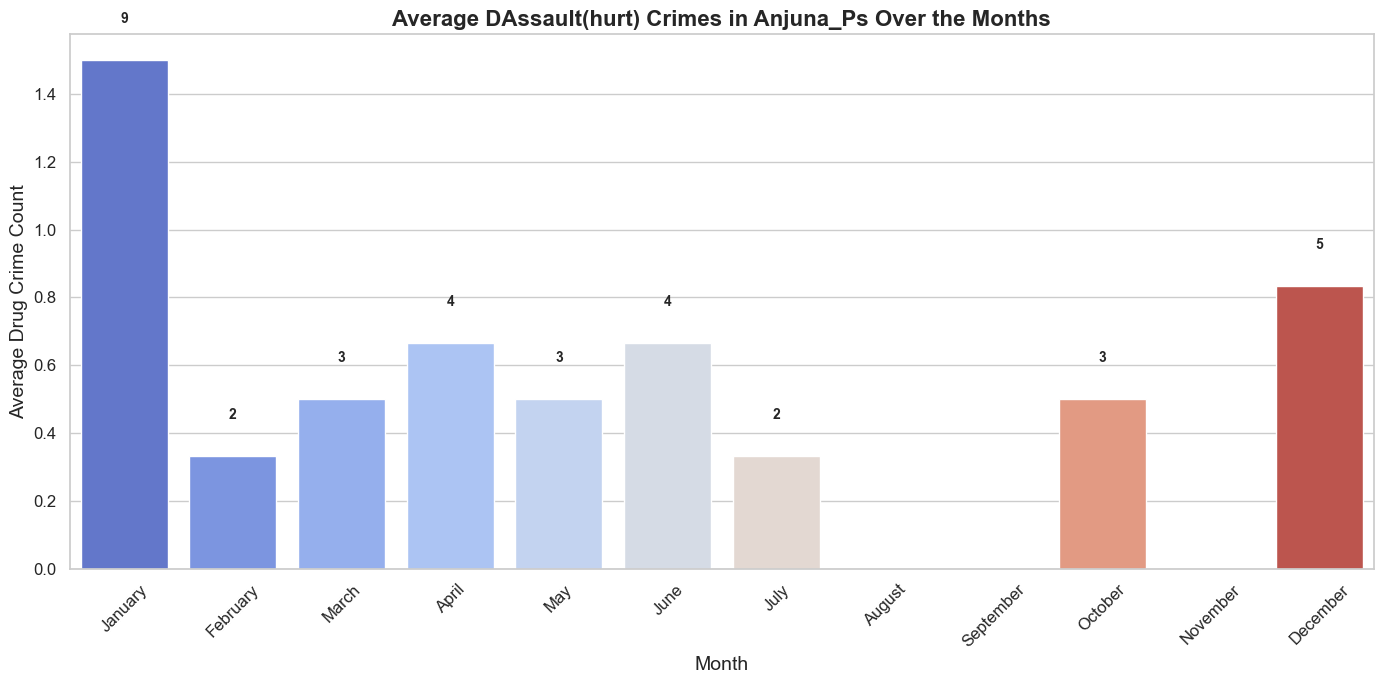

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for Anjuna_Ps and drug-related crimes
df_anjuna_drugs = df[(df["Police Station"] == "Mapusa_Ps") & 
                     (df["Head"].str.contains("Auto theft", case=False, na=False))]

# Make sure 'Month' column exists with month names
df_anjuna_drugs["Month"] = df_anjuna_drugs["Date"].dt.month_name()

# Define correct month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Compute average per month (total count divided by number of years)
monthly_counts = df_anjuna_drugs.groupby("Month").size().reset_index(name="Total_Count")
monthly_counts["Average_Drug_Crime_Count"] = monthly_counts["Total_Count"] / df_anjuna_drugs["Year"].nunique()

# Ensure months are in correct order
monthly_counts["Month"] = pd.Categorical(monthly_counts["Month"], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values("Month")

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
bars = sns.barplot(data=monthly_counts, x="Month", y="Average_Drug_Crime_Count", ax=ax, palette="coolwarm")

# Add count labels above bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    total = monthly_counts["Total_Count"].iloc[i]
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{total}", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
ax.set_title("Average DAssault(hurt) Crimes in Anjuna_Ps Over the Months", fontsize=16, fontweight='bold')
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Average Drug Crime Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4376\1184136256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df, x="Is_Weekend", ax=ax, palette=["skyblue", "salmon"])
C:\Users\User\AppData\Local\Temp\ipykernel_4376\1184136256.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Weekday", "Weekend"], fontsize=11)


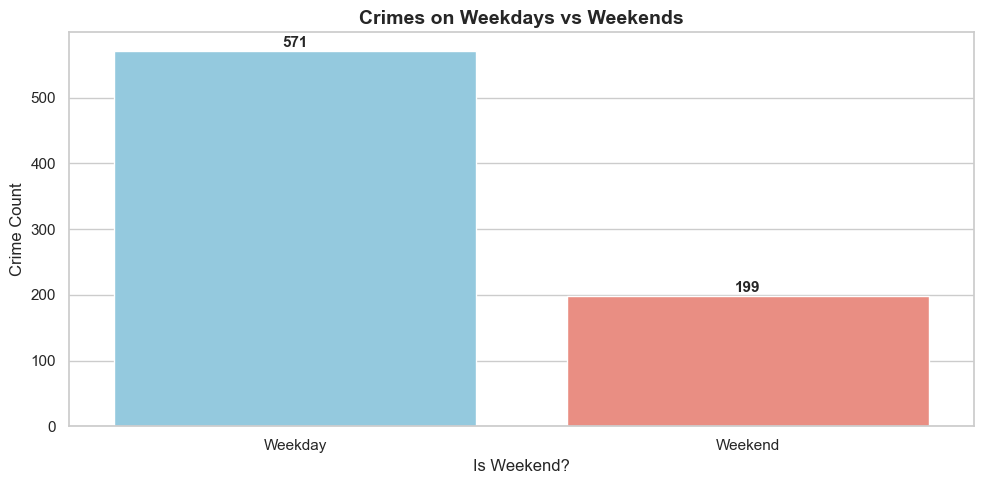

In [57]:
# Create Is_Weekend column
df["Is_Weekend"] = df["Day_of_Week"].isin(["Saturday", "Sunday"])

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
bars = sns.countplot(data=df, x="Is_Weekend", ax=ax, palette=["skyblue", "salmon"])

# Add count labels above bars
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{int(height)}", 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Titles and labels
ax.set_title("Crimes on Weekdays vs Weekends", fontsize=14, fontweight='bold')
ax.set_xlabel("Is Weekend?", fontsize=12)
ax.set_ylabel("Crime Count", fontsize=12)
ax.set_xticklabels(["Weekday", "Weekend"], fontsize=11)

plt.tight_layout()
plt.show()


Crime Counts per Month:
        Month  Crime Count
4     January           31
3    February           33
7       March           29
0       April           26
8         May           24
6        June           25
5        July           28
1      August           19
11  September           22
10    October           24
9    November           22
2    December           24


C:\Users\User\AppData\Local\Temp\ipykernel_4376\1967873982.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=monthly_avg_df, x="Month", y="Crime Count", ax=ax, palette=colors)


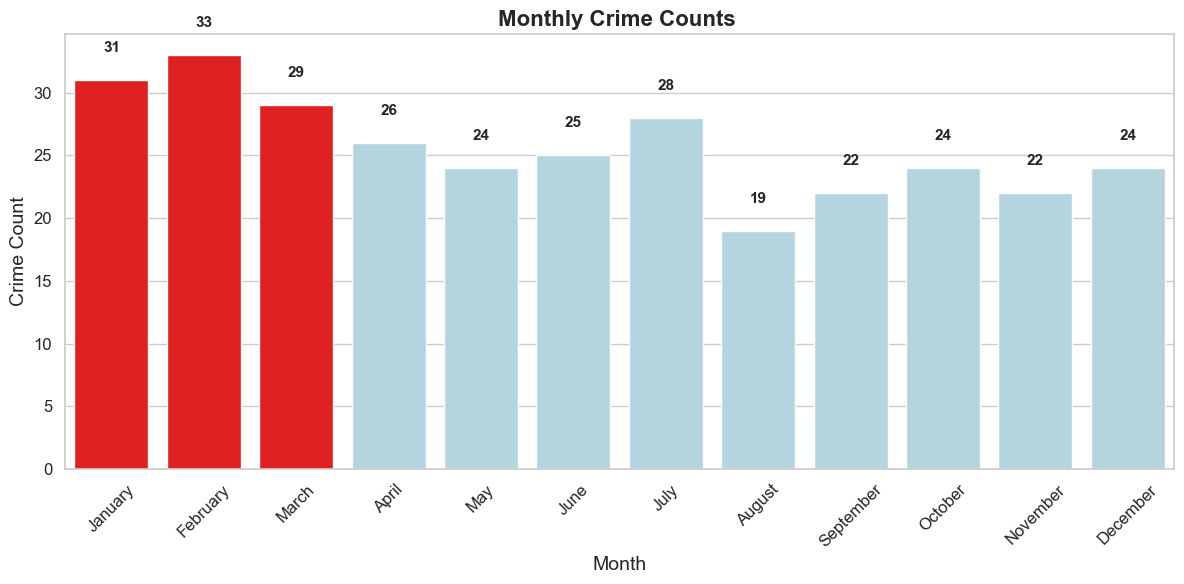

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "sy.csv"  # Replace with your actual CSV file path
df = pd.read_csv(file_path, encoding="latin1")

# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Extract only month names (ignoring year)
df["Month"] = df["Date"].dt.month_name()

# Group by Month and calculate crime count
monthly_avg_df = df.groupby("Month").size().reset_index(name="Crime Count")

# Order the months correctly
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
monthly_avg_df["Month"] = pd.Categorical(monthly_avg_df["Month"], categories=month_order, ordered=True)
monthly_avg_df = monthly_avg_df.sort_values("Month")

# Print all month counts
print("Crime Counts per Month:")
print(monthly_avg_df)

# Get the top 3 months with the highest crime count
top_3_months = monthly_avg_df.nlargest(3, "Crime Count")

# Define a color palette highlighting top 3 months
colors = ["red" if month in top_3_months["Month"].values else "lightblue" for month in monthly_avg_df["Month"]]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(data=monthly_avg_df, x="Month", y="Crime Count", ax=ax, palette=colors)

# Add value labels on bars
for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2, height + 2, f"{int(height)}",
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting the plot
ax.set_title("Monthly Crime Counts ", fontsize=16, fontweight='bold')
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Crime Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


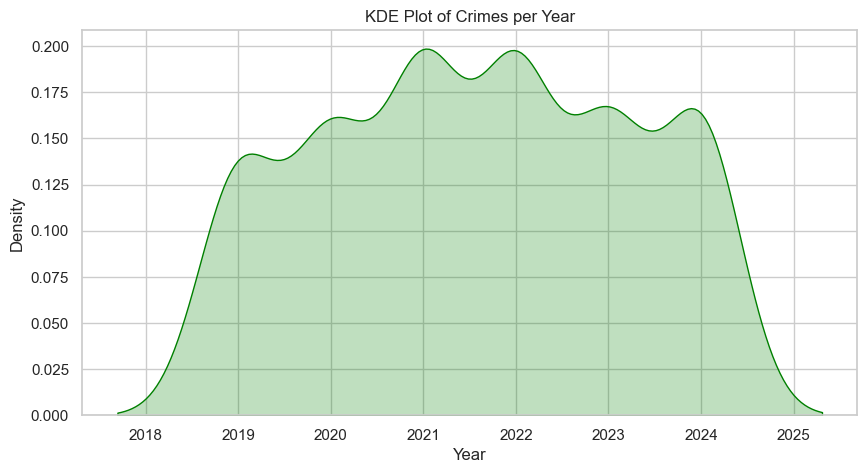

In [59]:
# 29. KDE Plot of Crimes per Year
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df["Year"], fill=True, color="green", ax=ax)
ax.set_title("KDE Plot of Crimes per Year")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4376\2974260528.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=df, x='Crime_Location_Type',


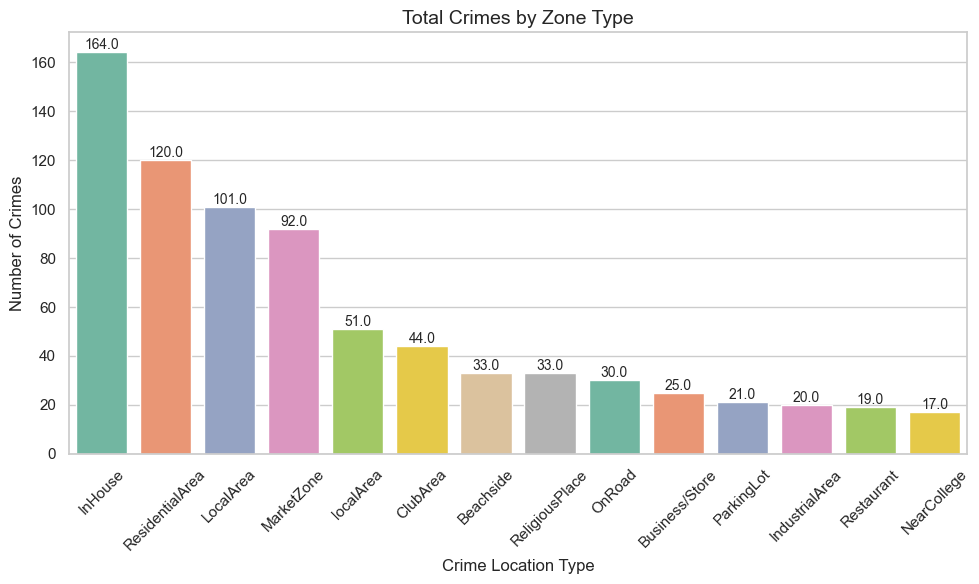


Top 3 crimes in 'Beachside':
  Drug Related (NDPS) (13 cases)
  Assault (Hurt) (7 cases)
  Theft (Auto Theft) (7 cases)

Top 3 crimes in 'Business/Store':
  Assault (Hurt) (6 cases)
  Theft (Auto Theft) (4 cases)
  Theft (HBT Night) (4 cases)

Top 3 crimes in 'ClubArea':
  Assault (Hurt) (20 cases)
  Drug Related (NDPS) (13 cases)
  Theft (Auto Theft) (6 cases)

Top 3 crimes in 'InHouse':
  Theft (House Theft) (46 cases)
  Assault (Hurt) (37 cases)
  Theft (HBT Night) (36 cases)

Top 3 crimes in 'IndustrialArea':
  Assault (Hurt) (5 cases)
  Theft (HBT Night) (3 cases)
  Theft (House Theft) (3 cases)

Top 3 crimes in 'LocalArea':
  Assault (Hurt) (26 cases)
  Theft (Auto Theft) (25 cases)
  Drug Related (NDPS) (22 cases)

Top 3 crimes in 'MarketZone':
  Theft (Auto Theft) (33 cases)
  Theft (House Theft) (19 cases)
  Theft (HBT Night) (16 cases)

Top 3 crimes in 'NearCollege':
  Assault (Hurt) (6 cases)
  Theft (HBT Night) (4 cases)
  Theft (Auto Theft) (2 cases)

Top 3 crimes in 'OnR

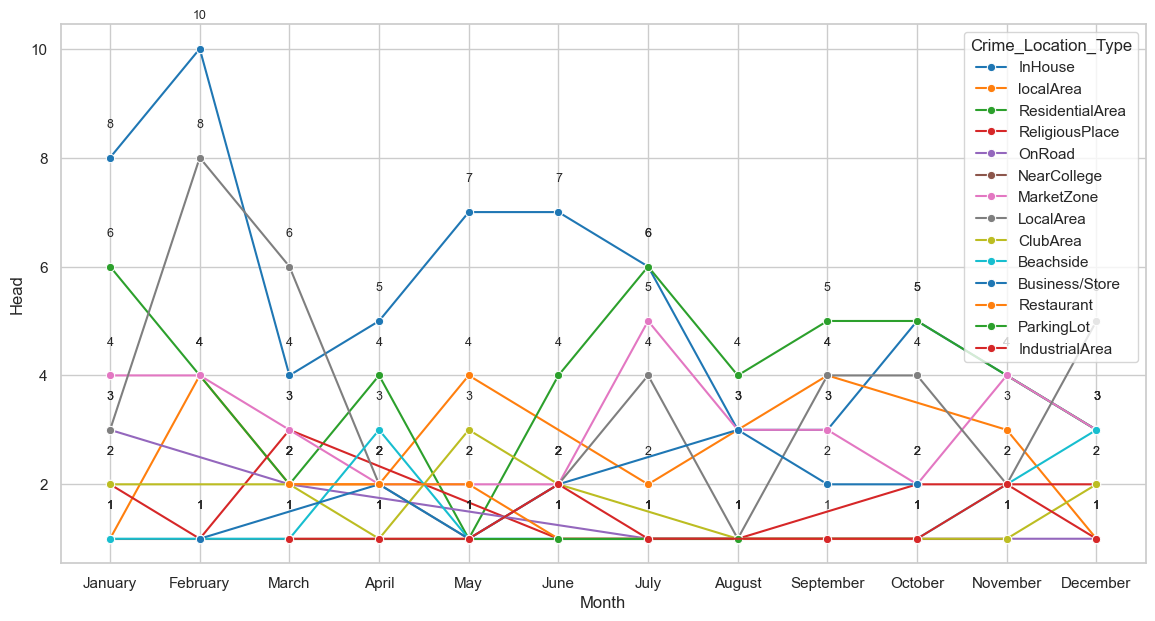

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Bar Plot - Total Crimes by Zone Type
plt.figure(figsize=(10, 6))  # Bigger size
barplot = sns.countplot(data=df, x='Crime_Location_Type',
                        order=df['Crime_Location_Type'].value_counts().index,
                        palette='Set2')

# Add counts on top of bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10)

plt.title('Total Crimes by Zone Type', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xlabel('Crime Location Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line Plot - Monthly trend per zone (total counts only)
# Ensure 'Month' column exists and is formatted
df['Month'] = df['Date'].dt.strftime('%B')  # Full month names

monthly_trend = df.groupby(['Month', 'Crime_Location_Type']).size().reset_index(name='Head')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_trend['Month'] = pd.Categorical(monthly_trend['Month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('Month')

plt.figure(figsize=(14, 7))  # Bigger size
lineplot = sns.lineplot(data=monthly_trend, x='Month', y='Head',
                        hue='Crime_Location_Type', marker='o', palette='tab10')

# Add count labels at each point
for line in monthly_trend['Crime_Location_Type'].unique():
    subset = monthly_trend[monthly_trend['Crime_Location_Type'] == line]
    for x, y in zip(subset['Month'], subset['Head']):
        plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=9)

# Group by Crime_Location_Type and Head, count occurrences
crime_by_location = df.groupby(['Crime_Location_Type', 'Head']).size().reset_index(name='Count')

# For each location type, get top 3 crimes
top3_crimes_per_location = (
    crime_by_location
    .sort_values(['Crime_Location_Type', 'Count'], ascending=[True, False])
    .groupby('Crime_Location_Type')
    .head(3)
)

# Print results
for location in top3_crimes_per_location['Crime_Location_Type'].unique():
    print(f"\nTop 3 crimes in '{location}':")
    crimes = top3_crimes_per_location[top3_crimes_per_location['Crime_Location_Type'] == location]
    for _, row in crimes.iterrows():
        print(f"  {row['Head']} ({row['Count']} cases)")
